In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

## Importar Datos

In [2]:
data = pd.read_csv('Hitters.csv')
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


## Explicación de variables

### **Player Performance (1986 Season):**
1. **`AtBat`**: Number of times the player was at bat (faced a pitcher) in 1986.  
2. **`Hits`**: Total hits (successful contact with the ball resulting in reaching base) in 1986.  
3. **`HmRun`**: Number of home runs (hits allowing the batter to circle all bases) in 1986.  
4. **`Runs`**: Total runs scored (times crossing home plate) in 1986.  
5. **`RBI`**: Runs Batted In (number of runs a player caused by their hits, including home runs) in 1986.  
6. **`Walks`**: Number of times the player was walked (awarded first base due to four balls) in 1986.  

---

### **Career Statistics (Cumulative Until 1986):**
7. **`CAtBat`**: Total times at bat during the player’s entire career.  
8. **`CHits`**: Total career hits.  
9. **`CHmRun`**: Total career home runs.  
10. **`CRuns`**: Total runs scored in the player’s career.  
11. **`CRBI`**: Total career Runs Batted In.  
12. **`CWalks`**: Total career walks.  

---

### **Player Demographics:**
13. **`Years`**: Number of years the player has been in the major leagues (experience).  

---

### **League/Division Affiliation:**
14. **`League`**: Player’s league at the **end of 1986** (`A` = American League, `N` = National League).  
15. **`Division`**: Player’s division at the **end of 1986** (`E` = East, `W` = West).  

---

### **Defensive Performance (1986 Season):**
16. **`PutOuts`**: Number of defensive plays where the player directly caused an out (e.g., catching a fly ball).  
17. **`Assists`**: Number of times the player contributed to an out made by another fielder.  
18. **`Errors`**: Number of fielding mistakes that benefited the opposing team.  

---

### **Salary:**
19. **`Salary`**: The player’s **1987 annual salary** (on opening day), measured in **thousands of dollars** (e.g., `500` = \$500,000). Missing values are marked as `NA`.  

---

### **Post-1986 League:**
20. **`NewLeague`**: Player’s league at the **beginning of 1987** (`A` or `N`). Indicates potential league changes after 1986.  

---

### Notes:
- **Career variables** (e.g., `CAtBat`, `CHits`) are cumulative totals up to and including 1986.  
- **Salary** is the target variable for prediction in many analyses.  
- **Factor variables** (`League`, `Division`, `NewLeague`) have categorical levels (e.g., `A/N`, `E/W`).  
- Missing values (`NA`) appear in some rows, particularly for `Salary`.

## Análisis de datos

Tenemos 3 variables categóricas: `League`, `Division` y `NewLeague`, para poder utilizarlas las haremos dummies.

In [3]:
data = pd.get_dummies(data, columns=['League','Division','NewLeague'])
target = 'Salary'
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,...,446,33,20,NaN,True,False,True,False,True,False
1,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,475.0,False,True,False,True,False,True
2,479,130,18,66,72,76,3,1624,457,63,...,880,82,14,480.0,True,False,False,True,True,False
3,496,141,20,65,78,37,11,5628,1575,225,...,200,11,3,500.0,False,True,True,False,False,True
4,321,87,10,39,42,30,2,396,101,12,...,805,40,4,91.5,False,True,True,False,False,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        322 non-null    int64  
 1   Hits         322 non-null    int64  
 2   HmRun        322 non-null    int64  
 3   Runs         322 non-null    int64  
 4   RBI          322 non-null    int64  
 5   Walks        322 non-null    int64  
 6   Years        322 non-null    int64  
 7   CAtBat       322 non-null    int64  
 8   CHits        322 non-null    int64  
 9   CHmRun       322 non-null    int64  
 10  CRuns        322 non-null    int64  
 11  CRBI         322 non-null    int64  
 12  CWalks       322 non-null    int64  
 13  PutOuts      322 non-null    int64  
 14  Assists      322 non-null    int64  
 15  Errors       322 non-null    int64  
 16  Salary       263 non-null    float64
 17  League_A     322 non-null    bool   
 18  League_N     322 non-null    bool   
 19  Division

Vemos que existen valores nulos para el salario que es nuestra variable a predecir, por lo que vemos cuantos datos faltantes hay.

In [5]:
pd.DataFrame(data.isnull().sum()).T

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,59,0,0,0,0,0,0


La variable de salario tiene 59 valores faltantes, los cuales debemos de quitar de nuestros datos.

In [6]:
data = data[data['Salary'].notnull()]

In [7]:
# calibración

def calibracion(predicciones, y, bins):
    df_calibracion = pd.DataFrame({
        'predicciones': predicciones,
        'y': y
    })
    df_calibracion['bins'] = pd.qcut(df_calibracion['predicciones'], q = bins, labels=False) + 1
    grouped = df_calibracion.groupby('bins').mean()
    plt.plot(grouped.predicciones, grouped.y, marker='o', label = 'Modelo', color = 'blue')
    plt.plot(grouped.predicciones, grouped.predicciones, marker='o', label = 'Real', color = 'red')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.legend()
    plt.grid()

## Modelos base

### Modelos lineales

In [8]:
X = data.copy()
X = X.drop(columns=[target])
y = data[target]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, data[target], test_size=0.2, random_state=42)

model_linear = linear_model.LinearRegression().fit(X_train, y_train)
predicciones_lineal = model_linear.predict(X_test)
r2_score(y_pred = predicciones_lineal, y_true = y_test)

0.29074518557981577

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, data[target], test_size=0.2, random_state=42)

model_linear = linear_model.Ridge().fit(X_train, y_train)
predicciones_ridge = model_linear.predict(X_test)
r2_score(y_pred = predicciones_ridge, y_true = y_test)

0.2918546425609011

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, data[target], test_size=0.2, random_state=42)

model_linear = linear_model.Lasso().fit(X_train, y_train)
predicciones_lasso = model_linear.predict(X_test)
r2_score(y_pred = predicciones_lasso, y_true = y_test)

c:\Users\ppmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.948e+06, tolerance: 4.367e+03
  model = cd_fast.enet_coordinate_descent(


0.29419784836356866

Relizamos una regresión lineal múltiple con todas nuestras varibles usando un regresión normal, otra ridge y una lasso. Vemos que el mejor resultado es la regresión con regularización Lasso, con un r2 de 0.2941, sin embargo es bastante bajo, por lo que el modelo no es bueno. Se probarán modelos polinomiales para ver los resultados.

### Modelos polinomiales

In [12]:
degree = 2

# Aplicar StandardScaler
X_scaled = StandardScaler().fit_transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Cross validation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge 
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly_2 = model.predict(X_test)
r2_score(y_pred=predicciones_poly_2, y_true=y_test)

c:\Users\ppmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.250e+05, tolerance: 4.367e+03
  model = cd_fast.enet_coordinate_descent(


0.21531044019485668

In [13]:
degree = 3

# Aplicar StandardScaler
X_scaled = StandardScaler().fit_transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Cross validation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge 
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly_3 = model.predict(X_test)
r2_score(y_pred=predicciones_poly_3, y_true=y_test)

c:\Users\ppmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.742e+05, tolerance: 4.367e+03
  model = cd_fast.enet_coordinate_descent(


-0.12607678757487806

Vemos que el uso de los modelos polinomiales no mejoró el r2 del modelo, por lo que no son de gran utilidad, sinedo Lasso todavía el mejor modelo.

### KNN

In [14]:
X = data.copy()
X = X.drop(columns=[target])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, data[target], test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
nn = []
r2 = []
for i in range(1, 50):
    model = KNeighborsRegressor(n_neighbors=i).fit(X_train_scaled, y_train)
    predicciones = model.predict(X_test_scaled)
    r2.append(r2_score(y_test, predicciones))
    nn.append(i)

resultados = pd.DataFrame({
    'nn': nn,
    'r2': r2
})
resultados[resultados['r2'] == resultados['r2'].max()]

,nn,r2
7,8,0.305726


Ahora utilizamos un modelo de KNN que con 8 vecinos obtuvo el mejor r2 de 0.3057, sinedo hasta el momento el mejor modelo.

### Regresión lineal múltiple OLS

En está parte utilizaremos la regresión lineal multiple de OLS, para ver el p-value de nuestras variables y ver cuales son significativas, e ir quitando la del p-avlues más alto de forma iterativa hasta tener solo variables significativas para nuestro modelo. En esta parte no realizamos train y test, pues es con la intención de ver que variables en teoría son importantes para el modelo.

In [17]:
model = smf.ols('Salary ~ ' + ' + '.join(data.columns.drop(['Salary', 'CHmRun', 'League_A', 'NewLeague_N', 'NewLeague_A', 
                                                            'Years', 'CHits', 'RBI', 'HmRun', 'Errors', 'Runs', 'Division_W',
                                                            'League_N', 'Assists', 'CAtBat'])), data = data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     35.54
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           2.02e-37
Time:                        01:47:53   Log-Likelihood:                -1881.3
No. Observations:                 263   AIC:                             3781.
Df Residuals:                     254   BIC:                             3813.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -6.6278     63

### Regresiones con variables significativas

### Modelos lineales

In [18]:
X_sig = X[['Division_E', 'AtBat', 'Hits', 'Walks', 'CRuns', 'CRBI', 'CWalks', 'PutOuts']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_sig, data[target], test_size=0.2, random_state=42)

model_linear = linear_model.LinearRegression().fit(X_train, y_train)
predicciones_lineal = model_linear.predict(X_test)
r2_score(y_pred = predicciones_lineal, y_true = y_test)

0.2890537208866849

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_sig, data[target], test_size=0.2, random_state=42)

model_linear = linear_model.Ridge().fit(X_train, y_train)
predicciones_ridge = model_linear.predict(X_test)
r2_score(y_pred = predicciones_ridge, y_true = y_test)

0.2889920910759831

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_sig, data[target], test_size=0.2, random_state=42)

model_linear = linear_model.Lasso().fit(X_train, y_train)
predicciones_lasso = model_linear.predict(X_test)
r2_score(y_pred = predicciones_lasso, y_true = y_test)

0.2888541158281829

Los tres modelos tienen un r2 muy similar de un poco más de 0.28, lo que significa que son peores que el modelo de KNN previamente realizado.

### Modelos polinomiales

In [22]:
degree = 2

# Aplicar StandardScaler
X_scaled = StandardScaler().fit_transform(X_sig)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Cross validation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge 
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly_2 = model.predict(X_test)
r2_score(y_pred=predicciones_poly_2, y_true=y_test)

c:\Users\ppmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.233e+06, tolerance: 4.367e+03
  model = cd_fast.enet_coordinate_descent(


0.33022622367250853

In [23]:
degree = 3

# Aplicar StandardScaler
X_scaled = StandardScaler().fit_transform(X_sig)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Cross validation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge 
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly_3 = model.predict(X_test)
r2_score(y_pred=predicciones_poly_3, y_true=y_test)

c:\Users\ppmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.999e+05, tolerance: 4.367e+03
  model = cd_fast.enet_coordinate_descent(


-0.03368367698188557

Una vez realizados los modelos polinomiales vemos que el modelo de grado 2 es el emjor hasta el momento con un r2 de 0.3302, en el cual solo utilizamos las variables que se podrían considerar sinificativas.

### KNN

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_sig, data[target], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nn = []
r2 = []
for i in range(1, 50):
    model = KNeighborsRegressor(n_neighbors=i).fit(X_train_scaled, y_train)
    predicciones = model.predict(X_test_scaled)
    r2.append(r2_score(y_test, predicciones))
    nn.append(i)

resultados = pd.DataFrame({
    'nn': nn,
    'r2': r2
})
resultados[resultados['r2'] == resultados['r2'].max()]

,nn,r2
9,10,0.321541


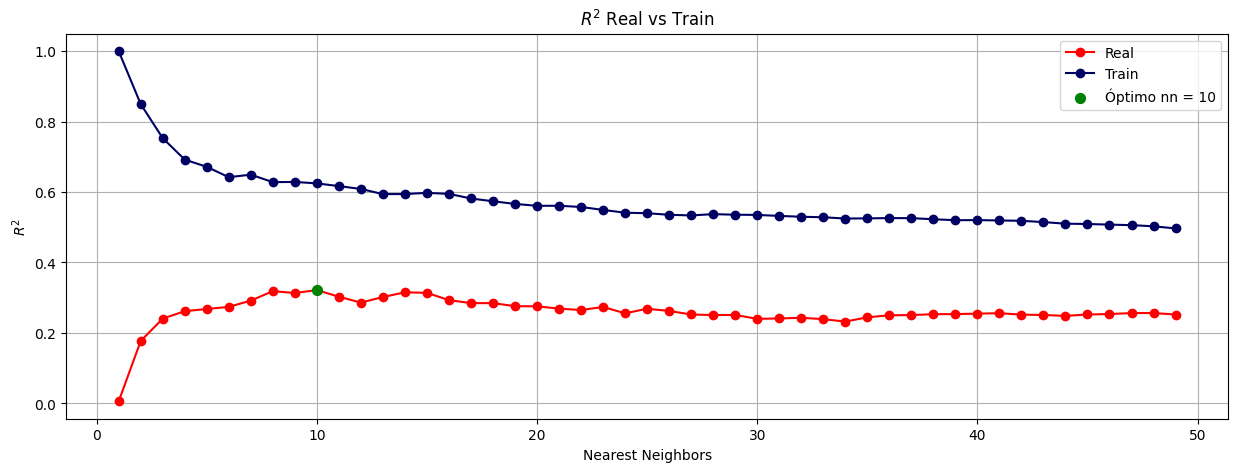

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_sig, data[target], test_size=0.2, random_state=42)

# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar listas para almacenar resultados
nn = []
r2_real = []
r2_train = []

# Evaluar KNN con distintos valores de k
for i in range(1, 50):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train_scaled, y_train)

    # Predicciones en test y train
    pred_test = model.predict(X_test_scaled)
    pred_train = model.predict(X_train_scaled)

    # Guardar valores de R^2
    r2_real.append(r2_score(y_test, pred_test))
    r2_train.append(r2_score(y_train, pred_train))
    nn.append(i)

# Convertir resultados en DataFrame
resultados = pd.DataFrame({'nn': nn, 'r2': r2_real, 'r2_train': r2_train})

# Encontrar el mejor número de vecinos
nn_opt = resultados.loc[resultados['r2'].idxmax(), 'nn']
r2_opt = resultados['r2'].max()

# Graficar resultados
plt.figure(figsize=(15, 5))
plt.plot(resultados.nn, resultados.r2, label='Real', color='red', marker='o')
plt.plot(resultados.nn, resultados.r2_train, label='Train', color='#000062', marker='o')
plt.scatter(nn_opt, r2_opt, label=f'Óptimo nn = {nn_opt}', color='green', s=50, zorder=3)
plt.grid()
plt.legend()
plt.title("$R^2$ Real vs Train")
plt.xlabel("Nearest Neighbors")
plt.ylabel("$R^2$")
plt.show()

Si bien mejoró en comparación con el KNN inicial con todas las variables, no es mejor el modelo polinomial de grado 2 obtenido usando solo las variables significativas.

Se podría decir que ya se probaron todos los modelos base, para buscar hacer un mejor modelo se puede optar por hacer feature engineering, ya sea transformaciones de variables, creación de nuevas, o las numéricas hacerlas categóricas.

## Visualización de los residuos

In [ ]:
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,475.0,False,True,False,True,False,True
2,479,130,18,66,72,76,3,1624,457,63,...,880,82,14,480.0,True,False,False,True,True,False
3,496,141,20,65,78,37,11,5628,1575,225,...,200,11,3,500.0,False,True,True,False,False,True
4,321,87,10,39,42,30,2,396,101,12,...,805,40,4,91.5,False,True,True,False,False,True
5,594,169,4,74,51,35,11,4408,1133,19,...,282,421,25,750.0,True,False,False,True,True,False


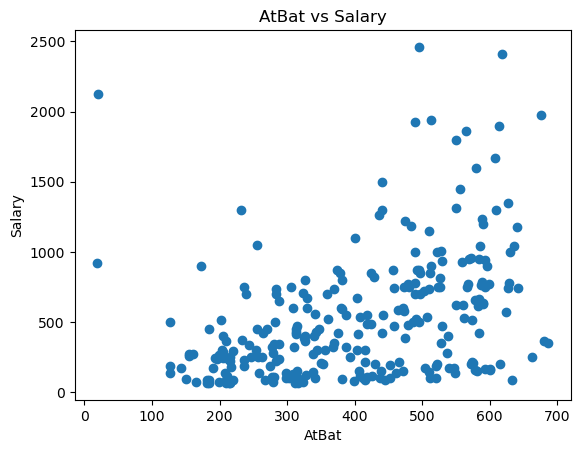

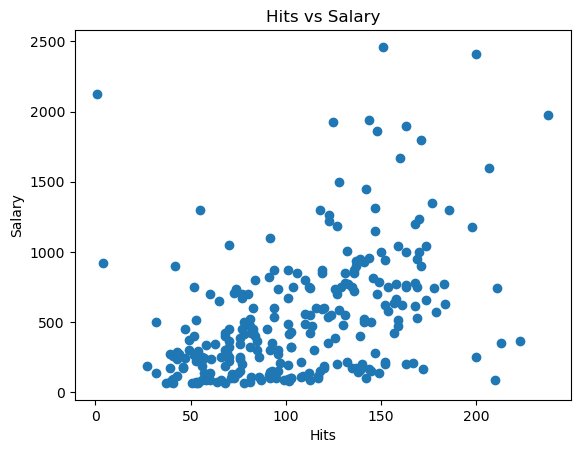

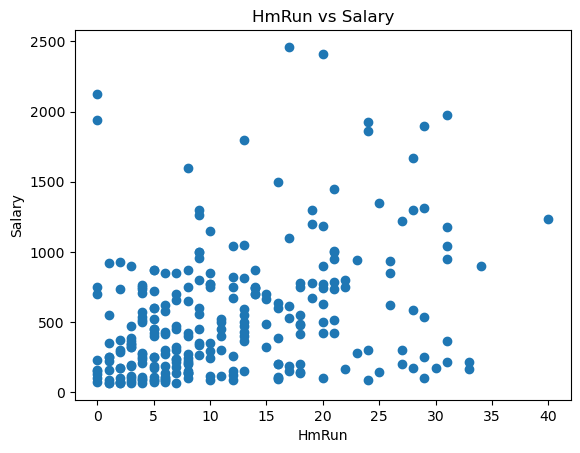

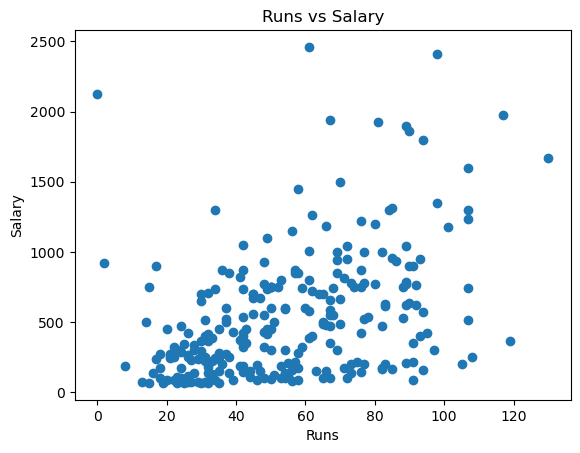

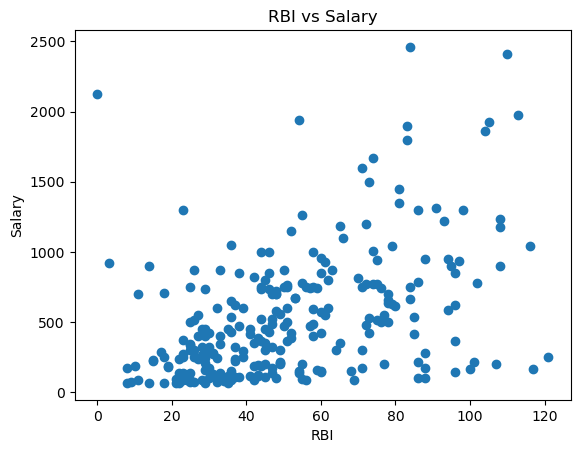

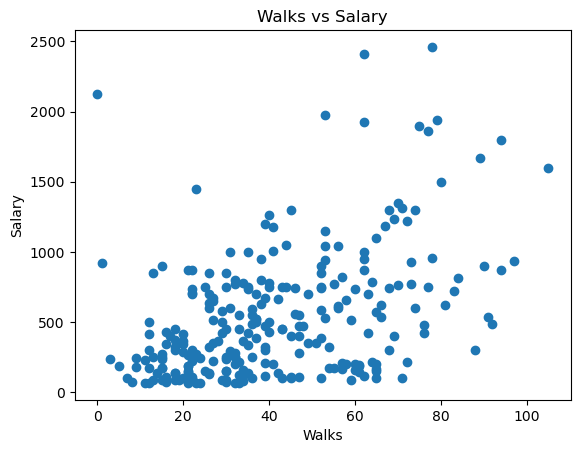

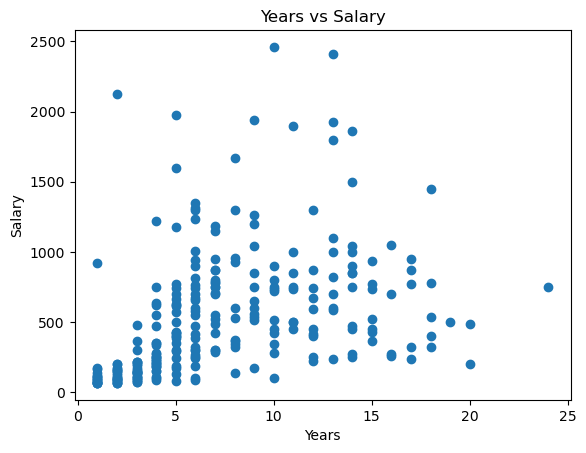

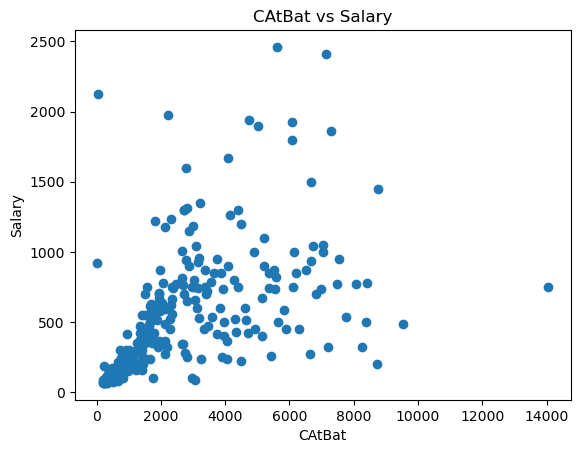

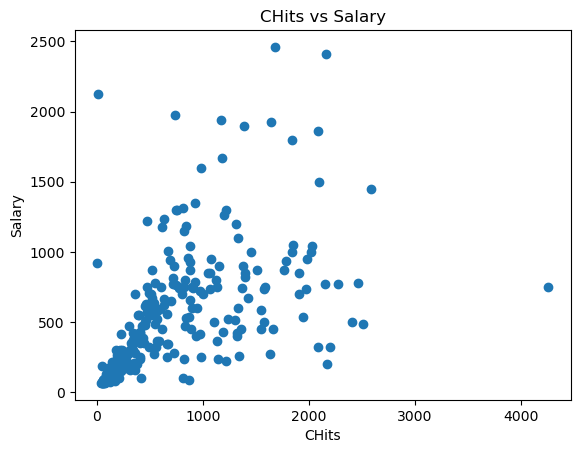

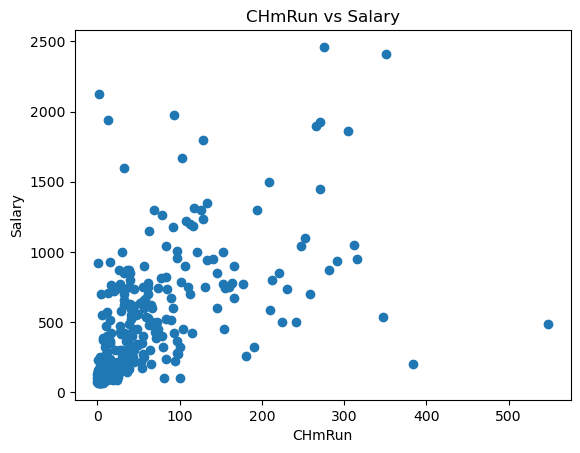

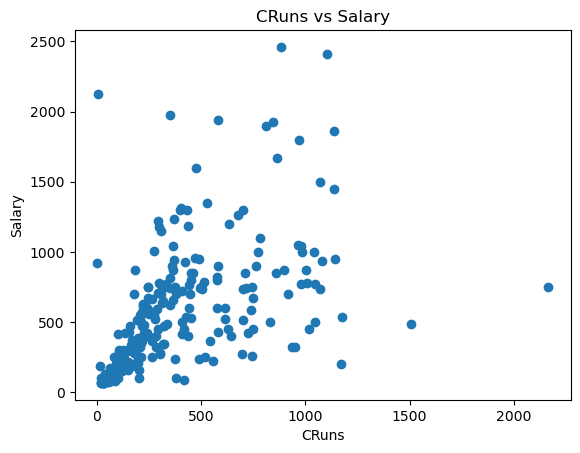

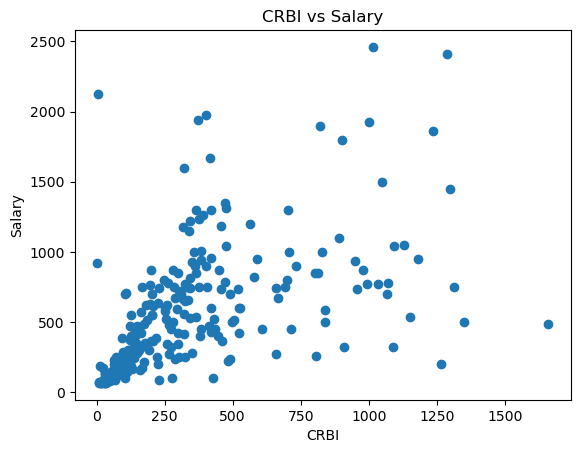

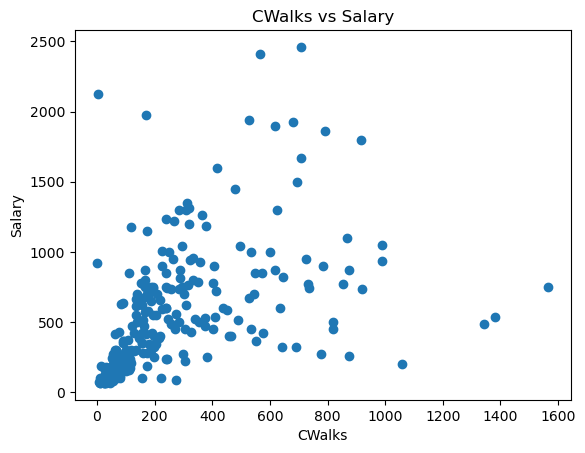

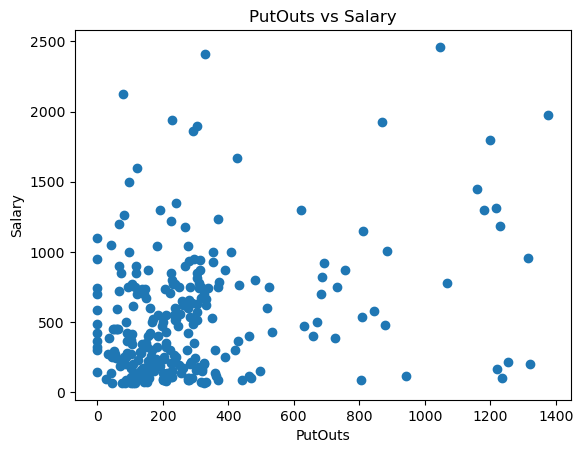

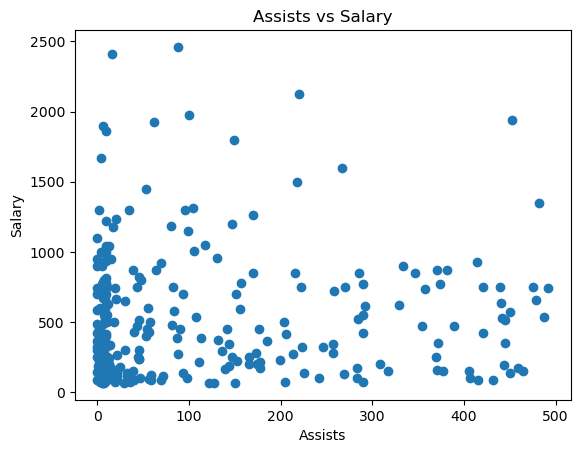

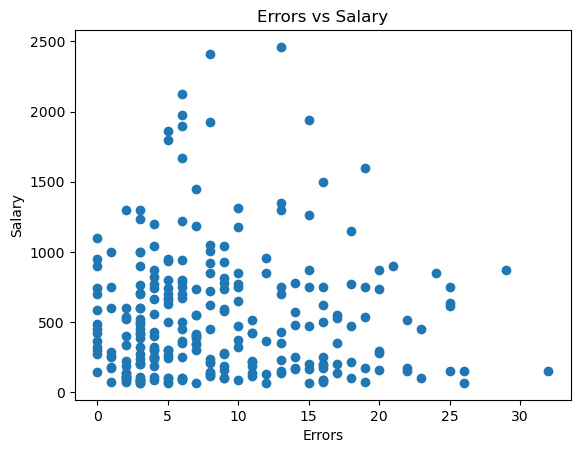

In [ ]:
num_features = data.iloc[:, :-7].columns

for i in num_features:
    plt.scatter(data[i],data[target])
    plt.title(f'{i} vs Salary')
    plt.xlabel(i)
    plt.ylabel('Salary')
    plt.show()

Estas gráficas nos ayudan a ver la dispersión de los datos, y en general para casi todas las variables numéricas existe una tendencia alcista, es decir, a mayor cantidad en el eje x, mayor salario, además cabe observar que para las variables acumulativas suelen tener una mayor cantidad de datos concentrados en el lado izquierdo del eje x.

## Análisis bivariado

In [ ]:
df_numerical = data.iloc[:, :-6]
df_numerical = df_numerical.copy()

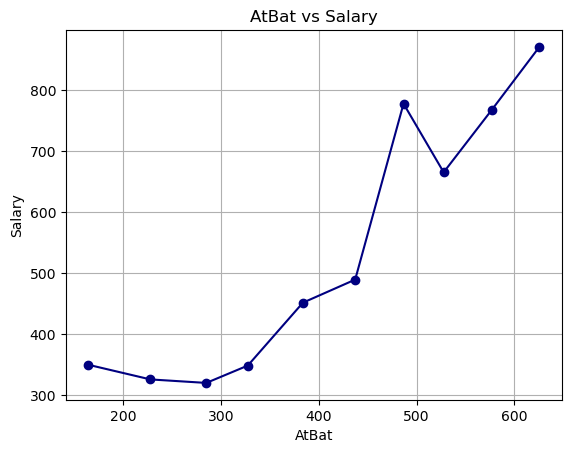

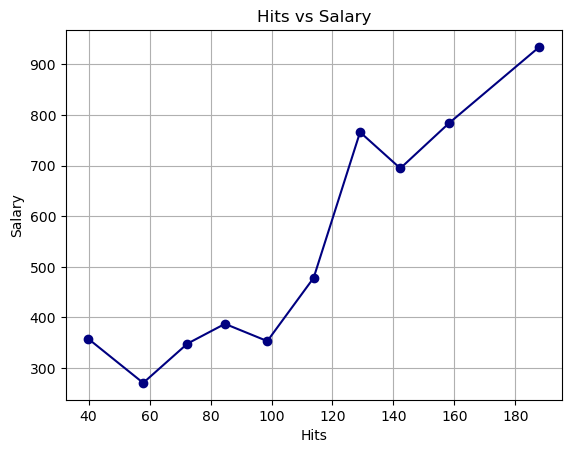

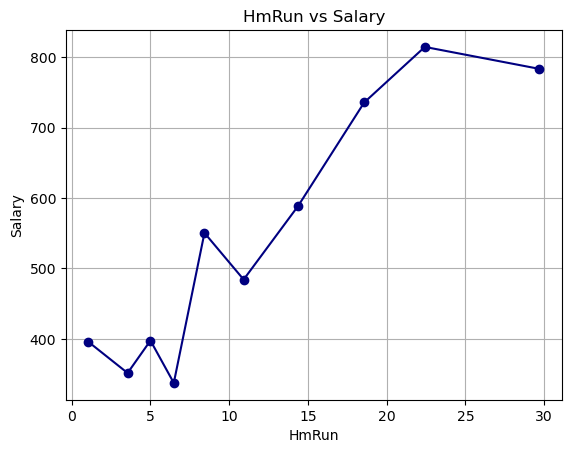

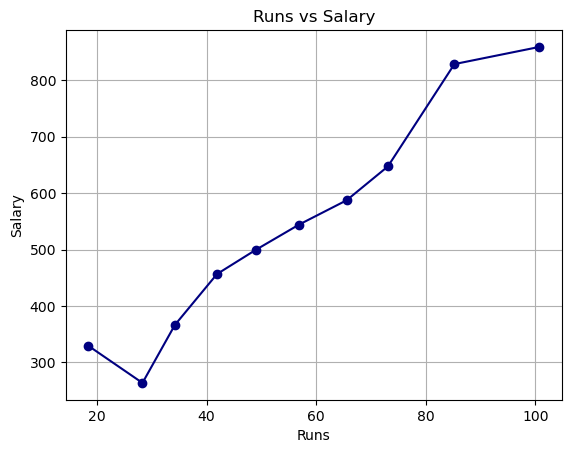

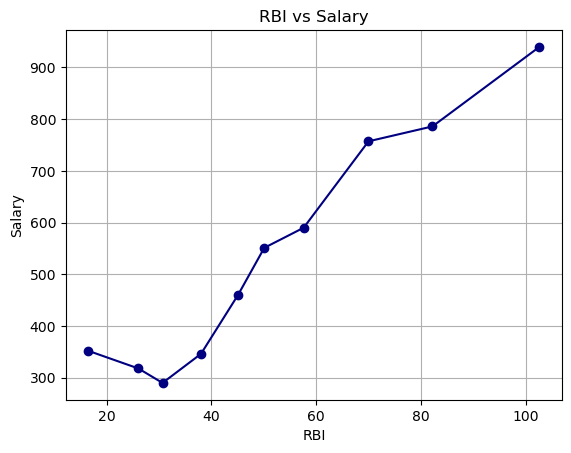

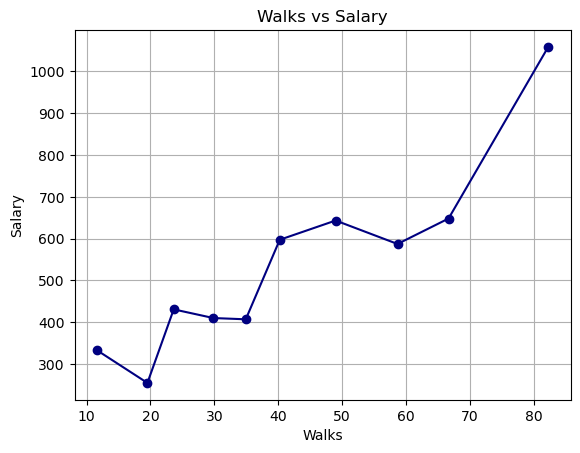

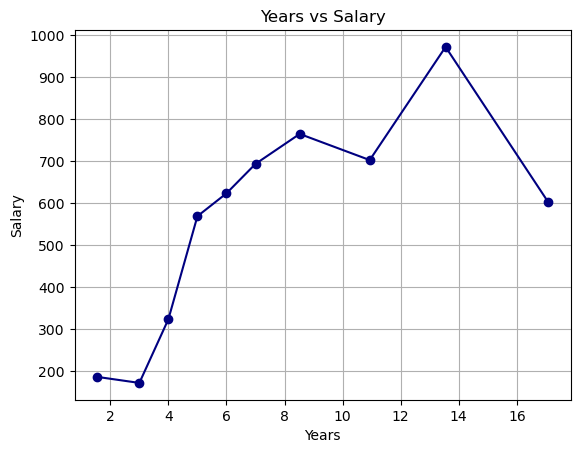

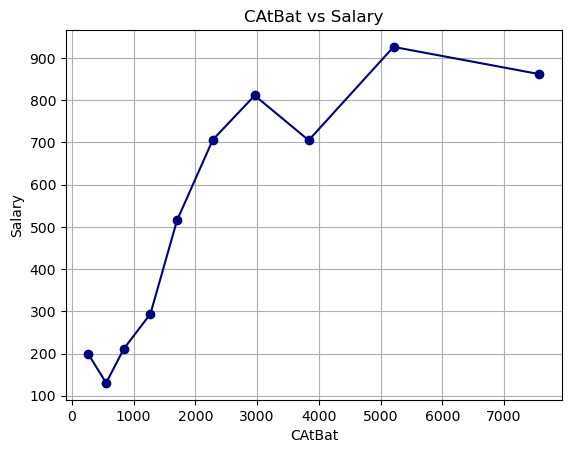

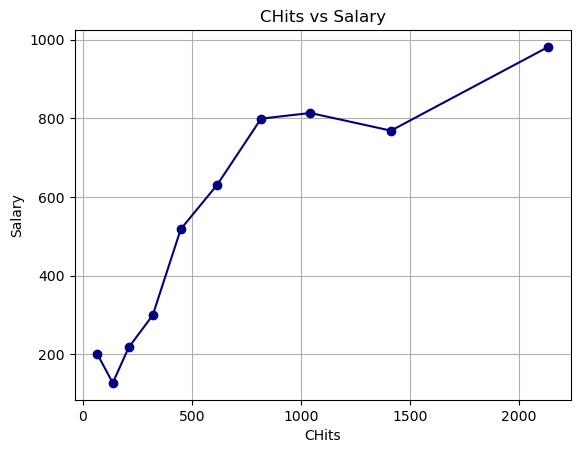

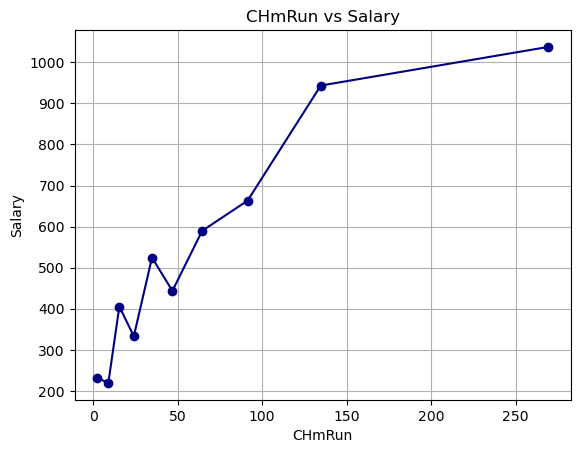

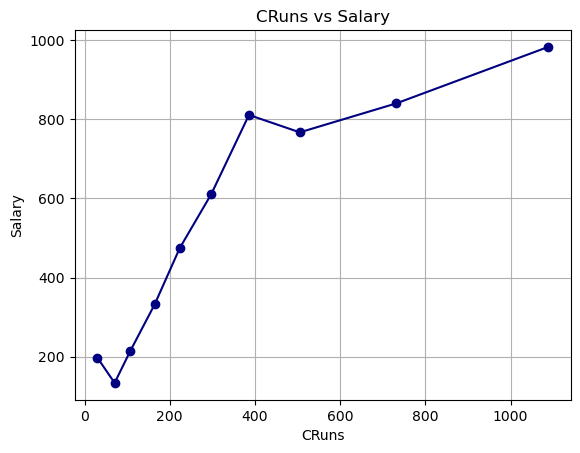

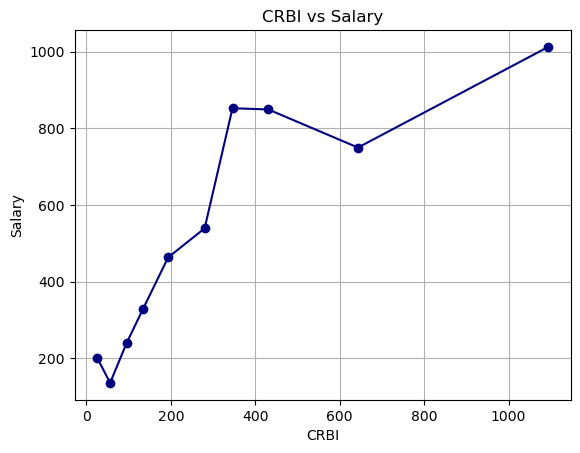

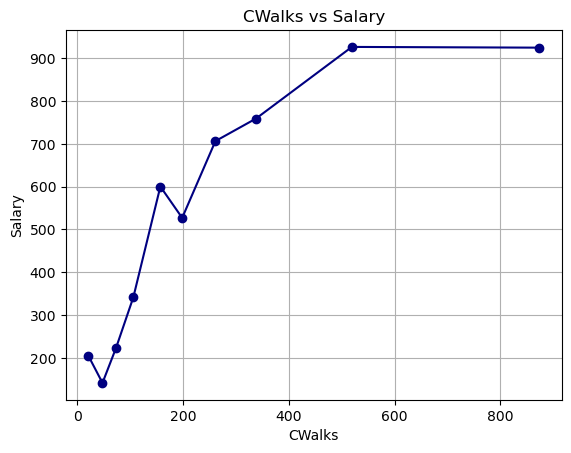

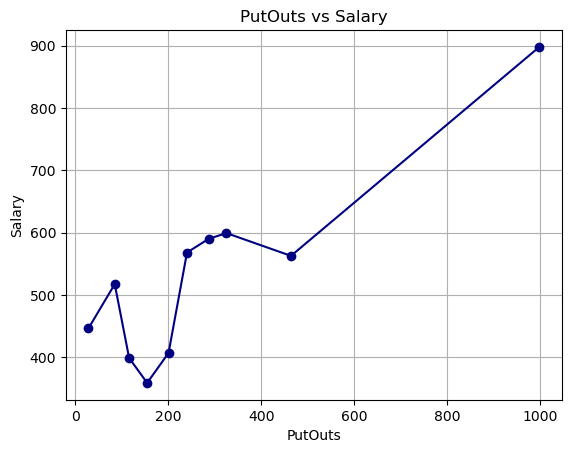

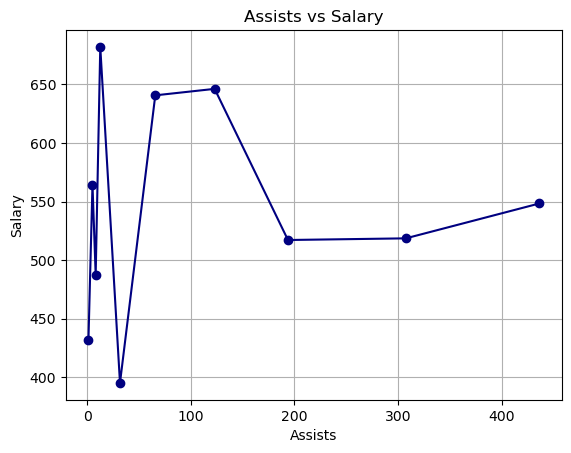

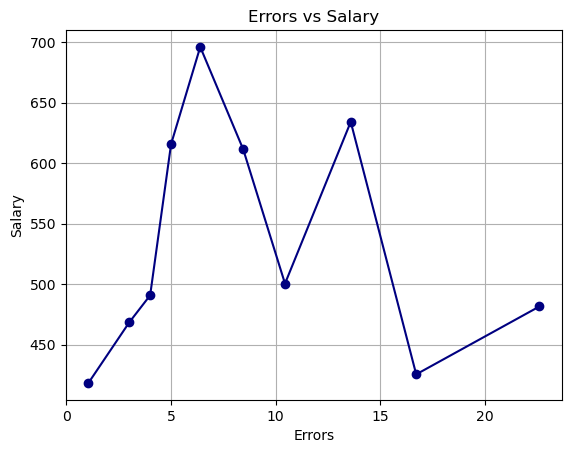

In [ ]:
for feature in num_features:
    df_numerical[f'{feature}_bins'] = pd.qcut(df_numerical[feature], q=10, labels=False) + 1
    grouped = df_numerical.groupby(f'{feature}_bins').mean()
    plt.plot(grouped[feature], grouped['Salary'], marker='o', c='navy')
    plt.title(f'{feature} vs Salary')
    plt.xlabel(feature)
    plt.ylabel('Salary')
    plt.grid()
    plt.show()